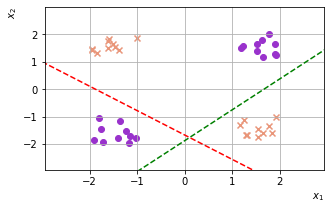

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

from numpy import array, full, concatenate
from numpy.random import ranf

# Example XOR dataset
X = concatenate([array([-2,-2])+ranf([10,2]), array([1,1])+ranf([10,2]),
                 array([-2,1])+ranf([10,2]), array([1,-2])+ranf([10,2])], axis=0)
y = concatenate([full(10, 0), full(10, 0), full(10, 1), full(10, 1)], axis=0)

plt.figure(figsize=(5, 3))

def plotX(_X, _y, _ax=None):  # Max 5 clusters/classes
    def get_minmax(_X, _m):  # _m = margin for visuals
        return _X[:,0].min()-_m, _X[:,0].max()+_m, _X[:,1].min()-_m, _X[:,1].max()+_m
    
    Colors = ['darkorchid', 'darksalmon', 'darkgreen', 'darkgrey', 'darkseagreen']
    Markers = ['o', 'x', '+', '1', '.']
    for c in range(max(_y)+1):
        plt.scatter(_X[_y==c,0], _X[_y==c,1], marker=Markers[c], color=Colors[c])
    #
    plt.grid(True, which='both')
    #
    if _ax is not None:
        _ax.get_xaxis().set_ticks([])
        _ax.get_yaxis().set_ticks([])
    #
    x1_min, x1_max, x2_min, x2_max = get_minmax(_X, 1)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel(r'$x_1$', horizontalalignment='right', x=1.0)
    plt.ylabel(r'$x_2$', horizontalalignment='right', y=1.0)

plotX(X,y)
plt.plot((-3,1.5),(1,-3), c='r', ls='--')
plt.plot((-1,3),(-3,1.5), c='g', ls='--')
plt.show()

In [19]:
import numpy as np
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


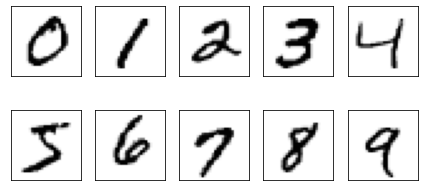

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

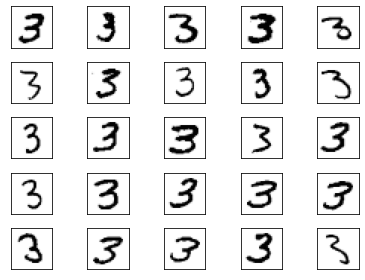

In [21]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 3][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

from numpy import sum, float

import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

<ipython-input-22-340c80337f98>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import sum, float


In [25]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

In [27]:
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [28]:
%%time
# 1 layer neural network
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, activation='logistic')
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 89.75%
[[ 927    0    4    2    0   19   13    6    9    0]
 [   0 1099   16    3    2    3    5    2    5    0]
 [  12    9  923   15   15    2   14   12   28    2]
 [   7    3   39  870    0   37    6   15   27    6]
 [   0    3    4    1  908    3   28    1    2   32]
 [   9    2   10   44   10  756   18   11   16   16]
 [  11    0   11    0    9   24  899    0    4    0]
 [   3   20   26   10    5    2    1  946    4   11]
 [   8   16   23   16    8   83   11   25  754   30]
 [  12    3    1    9   52    7    0   24    8  893]]
Wall time: 21.6 s


In [29]:
%%time

# 1 layer neural network, size 20
mlp = MLPClassifier(hidden_layer_sizes=(20,),max_iter=300)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
test_acc = ((sum(y_test == y_pred)).astype(float) / y_test.shape[0])

print(f'Accuracy= {test_acc*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

Accuracy= 92.01%
[[ 942    0    4    0    2    1   13    7   10    1]
 [   0 1108    6    2    1    2    2    1   13    0]
 [  13    6  919    6   12    0   12   10   52    2]
 [   0    0   32  884    0   55    0   14   20    5]
 [   1    4    6    0  909    2   11    5   14   30]
 [  10    1    4   40    4  787   13    3   24    6]
 [  11    2    4    0    5   12  914    0   10    0]
 [   2    6   16    5    7    1    0  963   11   17]
 [   5   10   14   22    7   20   15    9  868    4]
 [   4    5    0   11   20   11    3   41    7  907]]
Wall time: 41 s


In [96]:
from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float
    
class NeuralNetMLP(object):
    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + exp(-clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        z_h1 = dot(X, self.w_h1)
        a_h1 = self.sigmoid(z_h1)
        
        z_h2 = dot(a_h1, self.w_h2) #take the activated output of the first hidden layer and use it as input to the second
        a_h2 = self.sigmoid(z_h2) #activate
        
        z_out = dot(a_h2, self.w_out) #feed second layer output to output layer
        a_out = self.sigmoid(z_out) #activate
        
        #could just repeat this processes to add more layers
        
        return z_h1, a_h1, z_h2, a_h2, z_out, a_out
    
    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (log(output))
        term2 = (1.0-y_enc) * log(1.0-output)
        cost = sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h, a_h, z_h2, a_h2, z_out, a_out = self._forward(X)
        y_pred = argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        
        self.w_h1 = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        self.w_h2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, self.n_hidden)) #second layer weights
        #first term "self.n_hidden" is the size of input so in this case it should match size of output of previous layer
        #second term "self.n_hidden" is the size of output so should match the expected output size

        
        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        for i in range(self.epochs):
            indices = arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                z_h, a_h, z_h2, a_h2, z_out, a_out = self._forward(X_train[batch_idx])
                
                #Backpropogation - we undo what we just did so it is if we are traversing the network backwards
                sigmoid_derivative_h = a_h * (1.0-a_h)  # Eq 3 
                sigmoid_derivative_h2 = a_h2 * (1.0-a_h2) #
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5 output delta
                delta_h  = (dot(delta_out, self.w_out.T) * sigmoid_derivative_h)  # Eq 6 hidden layer 1 delta
                delta_h2 = (dot(delta_h, self.w_h2.T) * sigmoid_derivative_h2) #hidden layer 2 delta
                
                grad_w_out = dot(a_h2.T, delta_out)  # Eq 7 output gradient --> second hidden layer
                grad_w_h  = dot(X_train[batch_idx].T, delta_h)  # Eq 8 first hidden layer gradient --> input layer
                grad_w_h2 = dot(a_h.T, delta_h2) #second hidden layer gradient --> first hidden layer
                self.w_out -= self.eta*grad_w_out  # Eq 9 update weights
                self.w_h1 -= self.eta*grad_w_h  # Eq 9  
                self.w_h2 -= self.eta*grad_w_h2
                
            # Evaluation after each epoch during training
            z_h, a_h, z_h2, a_h2, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        return self

<ipython-input-96-bece21caaa45>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float


In [97]:
# Define and fit the neural network
nn = NeuralNetMLP(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

300/300 | Cost: 79268.16 | Train/Valid Acc.: 79.49%/81.28%  